In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDClassifier,SGDRegressor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns

In [37]:
df = pd.read_csv('D:/data/Student/Student_Performance.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [39]:
# convert all columns from 64 bit to 32 bit to save memory (float64 to float32 and int64 to int32)
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('float32')
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('int32')

In [40]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212557
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [41]:
LE = preprocessing.LabelEncoder().fit(['No','Yes'])
df['Extracurricular Activities'] = LE.transform(df['Extracurricular Activities'])

In [42]:
df['Performance Index Cat'] = pd.cut(df['Performance Index'],bins=[0,25,50,75,100],labels=[4,3,2,1])

In [43]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Performance Index Cat
0,7,99,1,9,1,91.0,1
1,4,82,0,4,2,65.0,2
2,8,51,1,7,2,45.0,3
3,5,52,1,5,2,36.0,3
4,7,75,0,8,5,66.0,2


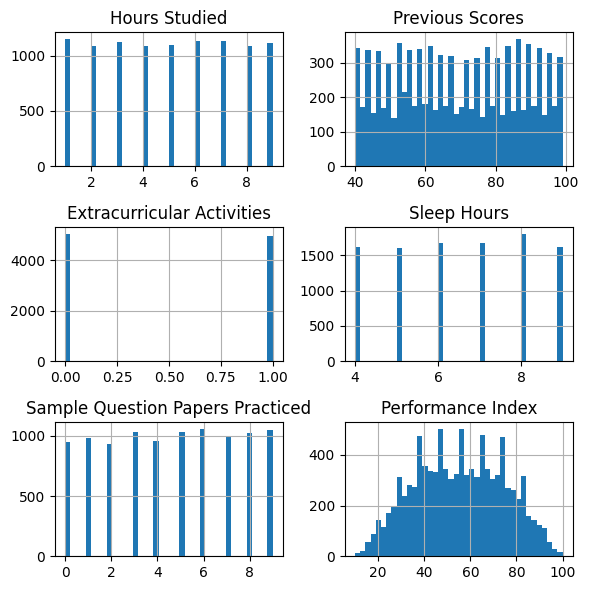

In [44]:
df.hist(figsize=(6,6),bins=40)
plt.tight_layout()

In [45]:
df['Sample in Hour'] = df['Sample Question Papers Practiced'] * df['Hours Studied']

In [46]:
df['Std Sleep Ratio'] = df['Sleep Hours'] / df['Hours Studied']

In [47]:
df['Study Efficiency'] = df['Previous Scores'] / df['Hours Studied']

In [48]:
df['Total Effort'] = df['Sample Question Papers Practiced'] + df['Hours Studied']

In [49]:
corr = df.drop('Performance Index',axis=1).corr()
corr['Performance Index Cat'].sort_values(ascending=False)

Performance Index Cat               1.000000
Std Sleep Ratio                     0.269998
Study Efficiency                    0.054974
Extracurricular Activities         -0.021994
Sample Question Papers Practiced   -0.036021
Sleep Hours                        -0.043883
Sample in Hour                     -0.240555
Total Effort                       -0.267058
Hours Studied                      -0.362028
Previous Scores                    -0.853027
Name: Performance Index Cat, dtype: float64

In [50]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Performance Index Cat,Sample in Hour,Std Sleep Ratio,Study Efficiency,Total Effort
0,7,99,1,9,1,91.0,1,7,1.285714,14.142857,8
1,4,82,0,4,2,65.0,2,8,1.000000,20.500000,6
2,8,51,1,7,2,45.0,3,16,0.875000,6.375000,10
3,5,52,1,5,2,36.0,3,10,1.000000,10.400000,7
4,7,75,0,8,5,66.0,2,35,1.142857,10.714286,12
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0,4,2,4.000000,49.000000,3
9996,7,64,1,8,5,58.0,2,35,1.142857,9.142857,12
9997,6,83,1,8,5,74.0,2,30,1.333333,13.833333,11
9998,9,97,1,7,0,95.0,1,0,0.777778,10.777778,9


In [51]:
X = df.drop(['Performance Index','Study Efficiency','Extracurricular Activities','Sample Question Papers Practiced','Sleep Hours'],axis=1)
y = df['Performance Index Cat']

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(Xtrain,ytrain)

pred = model.predict(Xtest)
print(metrics.f1_score(ytest,pred,average='weighted'))

1.0


In [17]:
cvs = cross_val_score(model, Xtrain, ytrain, cv=10)
print(cvs)
print(cvs.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


In [20]:
models = {
    "KNeighborsClassifier":KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "SGDClassifier":SGDClassifier(),
    "SVC":SVC()
}
for name,model_object in models.items():
    model = model_object
    model.fit(Xtrain,ytrain)
    pred = model.predict(Xtest)
    print(f"{name}:{metrics.f1_score(ytest,pred,average='weighted')}")

KNeighborsClassifier:0.9398311563735099
DecisionTreeClassifier:1.0
RandomForestClassifier:1.0
GradientBoostingClassifier:1.0
SGDClassifier:0.8011607178509548
SVC:0.9289429303917227


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# تعریف مدل
gb = GradientBoostingClassifier(random_state=42)

# تعریف پارامترهای مورد آزمایش
param_grid = {
    'n_estimators': [100, 200, 300],        # تعداد درخت‌ها
    'learning_rate': [0.001, 0.01, 0.1, 0.2],  # نرخ یادگیری
    'max_depth': [3, 4, 5, 6],              # عمق حداکثر درخت‌ها
    'min_samples_split': [2, 5, 10],        # حداقل تعداد نمونه‌ها برای تقسیم یک نود
    'min_samples_leaf': [1, 2, 4],          # حداقل تعداد نمونه‌ها برای هر برگ
}

# تنظیم GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, 
                           cv=5)

# آموزش مدل
grid_search.fit(Xtrain, ytrain)

# چاپ بهترین پارامترها
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}


# قبل

In [79]:
X = df.drop(['Performance Index','Extracurricular Activities','Sleep Hours'],axis=1)
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print(metrics.mean_absolute_error(prediction,y_test))
print(metrics.r2_score(prediction,y_test))

1.7064763503417966
0.9871516181274984


In [78]:
models = {
"LinearRegression":LinearRegression(),
"Lasso":Lasso(),
"Ridge":Ridge(),
"SGDRegressor":SGDRegressor(),
"KNeighborsRegressor":KNeighborsRegressor()
}
for name,model_object in models.items():
    model = model_object
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print(f"{name}:{metrics.mean_absolute_error(y_test,pred)}")

LinearRegression:1.7064763503417966
Lasso:1.831357143022264
Ridge:1.7065107887997861
SGDRegressor:67383225822.15067
KNeighborsRegressor:1.9156000000000002


In [72]:
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
scores = -scores
print(f'Mean MAE: {scores.mean()}')

print(f'MAE for each fold: {scores}') 


Mean MAE: 1.838577618284908
MAE for each fold: [1.80523494 1.86490331 1.82948399 1.88112814 1.82834247 1.79035428
 1.84197371 1.87578913 1.86545671 1.80310949]


<Axes: >

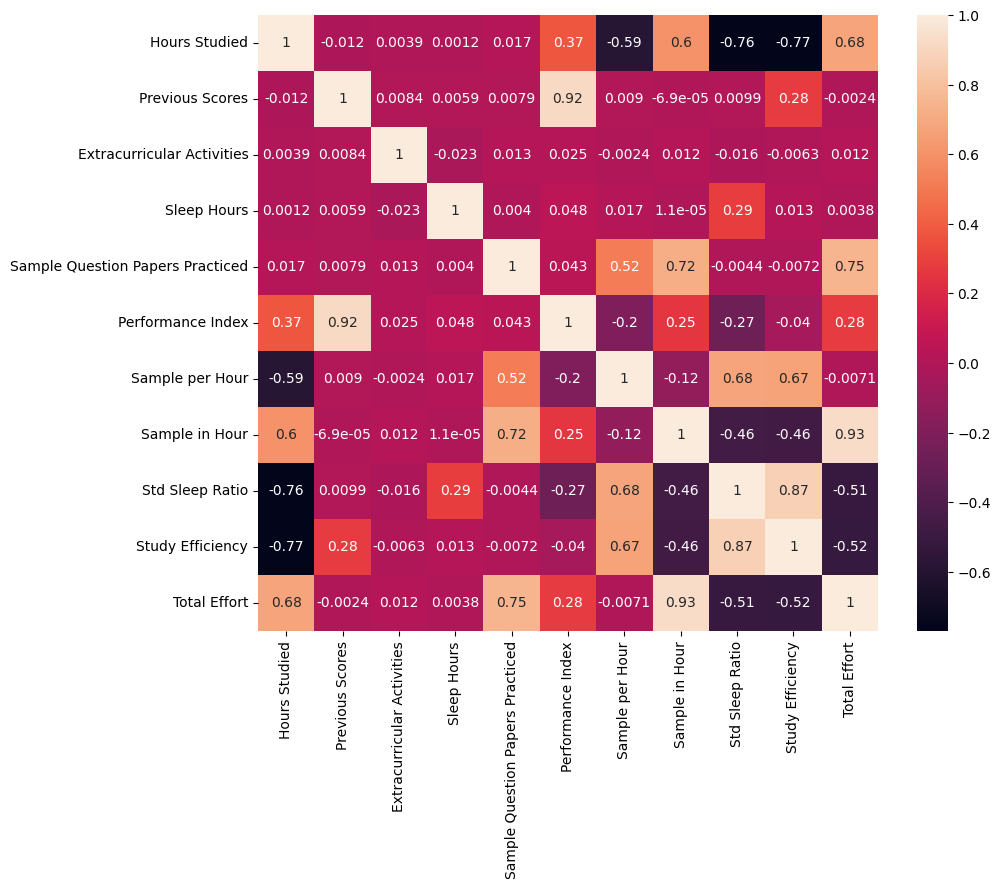

In [43]:
corr = df.corr()
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)